# 1. Perkenalan

<b><u>Milestone 2</u></b>

Nama : Muhammad Azhar Khaira

Batch : RMT-033

Dataset : [Data](loan_approval_dataset.csv)

Source : [Data Source](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset)

Objectives:

Project kali ini bertujuan membuat model untuk memprediksi persetujuan peminjaman dana berdasarkan dari profil, finansial dan aset pengaju pinjaman pada suatu lembaga peminjaman dana.

Model dibuat menggunakan model K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest dan CatBoost yang kemudian dilakukan hyperparameter tunning.

Matriks evaluasi yang digunakan adalah Accuracy, Precision, Recall dan F1 Score.

Conceptual Problems:
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang dipilih !
3. Jelaskan apa yang dimaksud dengan Cross Validation !

# 2. Import Libraries

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

# 3. Data Loading

In [329]:
# load csv
df_ori = pd.read_csv("loan_approval_dataset.csv")

In [330]:
# show df_ori
df_ori

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

## 3.1. Column Description

Deskripsi Kolom:

| No | Kolom                     | Deskripsi                                                                 |
|----|---------------------------|---------------------------------------------------------------------------|
| 1  | loan_id                   | ID unik untuk setiap pinjaman.                                            |
| 2  | no_of_dependents          | Jumlah tanggungan peminjam.                                               |
| 3  | education                 | Tingkat pendidikan peminjam.                                              |
| 4  | self_employed             | Status apakah peminjam wiraswasta.                                        |
| 5  | income_annum              | Pendapatan tahunan peminjam.                                              |
| 6  | loan_amount               | Jumlah pinjaman yang diminta.                                             |
| 7  | loan_term                 | Jangka waktu pinjaman dalam bulan.                                        |
| 8  | cibil_score               | Skor CIBIL peminjam, yang digunakan untuk menilai kelayakan kredit.       |
| 9  | residential_assets_value  | Nilai aset perumahan yang dimiliki peminjam.                              |
| 10 | commercial_assets_value   | Nilai aset komersial yang dimiliki peminjam.                              |
| 11 | luxury_assets_value       | Nilai aset mewah yang dimiliki peminjam.                                  |
| 12 | bank_asset_value          | Nilai aset di bank yang dimiliki peminjam.                                |
| 13 | loan_status               | Status persetujuan pinjaman.                                              |

In [331]:
# df_ori column name
df_ori.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

insight:
- terdapat white space pada nama kolom
- akan dilakukan triming pada nama kolom

In [332]:
# column name trimming
df_ori.columns = df_ori.columns.str.strip()

In [333]:
# check trimming result
df_ori.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [334]:
# show df_ori info
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


insight:
- dataset terdiri dari 4269 rows dan 13 columns
- tipe data terdiri dari int64(10 kolom), object(3 kolom)

In [335]:
# df_ori numeric column describe
df_ori.describe().round(2).T

count         mean         std       min  \
loan_id                   4269.0      2135.00     1232.50       1.0   
no_of_dependents          4269.0         2.50        1.70       0.0   
income_annum              4269.0   5059123.92  2806839.83  200000.0   
loan_amount               4269.0  15133450.46  9043362.98  300000.0   
loan_term                 4269.0        10.90        5.71       2.0   
cibil_score               4269.0       599.94      172.43     300.0   
residential_assets_value  4269.0   7472616.54  6503636.59 -100000.0   
commercial_assets_value   4269.0   4973155.31  4388966.09       0.0   
luxury_assets_value       4269.0  15126305.93  9103753.67  300000.0   
bank_asset_value          4269.0   4976692.43  3250185.31       0.0   

                                25%         50%         75%         max  
loan_id                      1068.0      2135.0      3202.0      4269.0  
no_of_dependents                1.0         3.0         4.0         5.0  
income_annum              2700000.0   5100000.0   7500000.0   9900000.0  
loan_amount               7700000.0  14500000.0  21500000.0  39500000.0  
loan_term                       6.0        10.0        16.0        20.0  
cibil_score                   453.0       600.0       748.0       900.0  
residential_assets_value  2200000.0   5600000.0  11300000.0  29100000.0  
commercial_assets_value   1300000.0   3700000.0   7600000.0  19400000.0  
luxury_assets_value       7500000.0  14600000.0  21700000.0  39200000.0  
bank_asset_value          2300000.0   4600000.0   7100000.0  14700000.0

insight:
- `no_of_dependents` memiliki rata-rata 2 tanggungan
- `income_annum` memiliki rata-rata 5,059,123.92 dengan rentang 200,000 hingga 9,900,000
- `loan_amount` memiliki rata-rata 15,133,450.46 dengan rentang 300,000 hingga 39,500,000
- `loan_term` memiliki rata-rata 10 bulan
- `cibil_score` memiliki rata-rata 599.94 dengan rentang 300 hingga 900
- `residential_assets_value` memiliki rata-rata 7,472,616.54 dengan rentang -100,000 hingga 29,100,000
- `commercial_assets_value` memiliki rata-rata 4,973,155.31 dengan rentang 0 hingga 19,400,000
- `luxury_assets_value` memiliki rata-rata 15,126,305.93 dengan rentang 300,000 hingga 39,200,000
- `bank_asset_value` memiliki rata-rata 4,976,692.43 dengan rentang 3,250,185.31 hingga 14,700,000

In [336]:
# df_ori categoric column describe
df_cat_desc = df_ori.describe(include=["object"]).T
df_cat_desc["%"] = df_cat_desc["freq"] / df_cat_desc["count"]
df_cat_desc

count unique        top  freq         %
education      4269      2   Graduate  2144  0.502225
self_employed  4269      2        Yes  2150  0.503631
loan_status    4269      2   Approved  2656   0.62216

insight:
- pada `education`, value `Graduate` memiliki proporsi sedikit lebih banyak dari pada value lainnya dengan persentase 50.22% (2,144)
- pada `self_employed`, value `Yes` memiliki proporsi sedikit lebih banyak dari pada value lainnya dengan persentase 50.36% (2,150)
- pada `loan_status`, value `Approved` memiliki proporsi terbanyak dengan persentase 62.21% (2,656)

## 3.2. Data Loadng Conclusion

Dataset berisi informasi mengenai pinjaman yang mencakup berbagai atribut untuk setiap peminjam di antaranya adalah jumlah tanggungan, status pendidikan, status self employed, pendapatan, aset, jumlah pinjaman, jangka waktu pinjaman dan skor CIBIL.

# 4. Exploratory Data Analysis (EDA)

In [337]:
# copy df_ori to dataframe named df
df = df_ori.copy()

In [338]:
# show df
df

loan_id  no_of_dependents      education self_employed  income_annum  \
0           1                 2       Graduate            No       9600000   
1           2                 0   Not Graduate           Yes       4100000   
2           3                 3       Graduate            No       9100000   
3           4                 3       Graduate            No       8200000   
4           5                 5   Not Graduate           Yes       9800000   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes       1000000   
4265     4266                 0   Not Graduate           Yes       3300000   
4266     4267                 2   Not Graduate            No       6500000   
4267     4268                 1   Not Graduate            No       4100000   
4268     4269                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   2400000   
1        12200000          8          417                   2700000   
2        29700000         20          506                   7100000   
3        30700000          8          467                  18200000   
4        24200000         20          382                  12400000   
...           ...        ...          ...                       ...   
4264      2300000         12          317                   2800000   
4265     11300000         20          559                   4200000   
4266     23900000         18          457                   1200000   
4267     12800000          8          780                   8200000   
4268     29700000         10          607                  17800000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  \
0                    17600000             22700000           8000000   
1                     2200000              8800000           3300000   
2                     4500000             33300000          12800000   
3                     3300000             23300000           7900000   
4                     8200000             29400000           5000000   
...                       ...                  ...               ...   
4264                   500000              3300000            800000   
4265                  2900000             11000000           1900000   
4266                 12400000             18100000           7300000   
4267                   700000             14100000           5800000   
4268                 11800000             35700000          12000000   

     loan_status  
0       Approved  
1       Rejected  
2       Rejected  
3       Rejected  
4       Rejected  
...          ...  
4264    Rejected  
4265    Approved  
4266    Rejected  
4267    Approved  
4268    Approved  

[4269 rows x 13 columns]

## 4.1. Check Duplicate

In [339]:
# check duplicate
df.duplicated().sum()

0

insight:
- tidak ada data duplikat

## 4.2. Check Missing Value

In [340]:
# check missing value
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

insight:
- tidak ada missing value

## 4.3. Columns

### 4.3.1. no_of_dependents

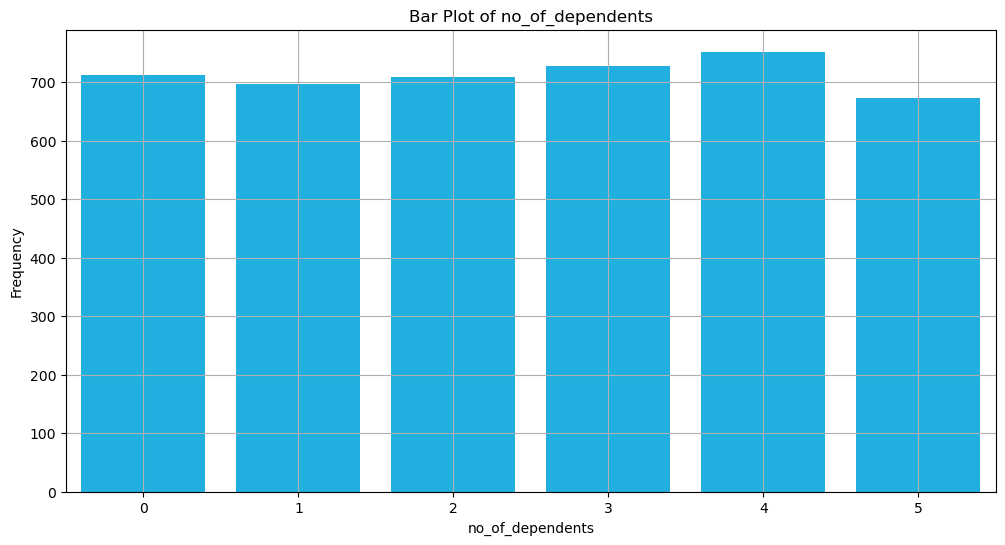

In [341]:
# unique value counts no_of_dependents
value_counts = df["no_of_dependents"].value_counts().sort_index()

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=value_counts.index, y=value_counts.values, color="deepskyblue")

# label
plt.title("Bar Plot of no_of_dependents")
plt.xlabel("no_of_dependents")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- rentang jumlah tanggungan mulai dari 0 hingga 5
- distribusi data tersebar relatif merata namun 4 tanggungan memiliki frekuensi sedikit lebih banyak dari yang lain

### 4.3.2. education

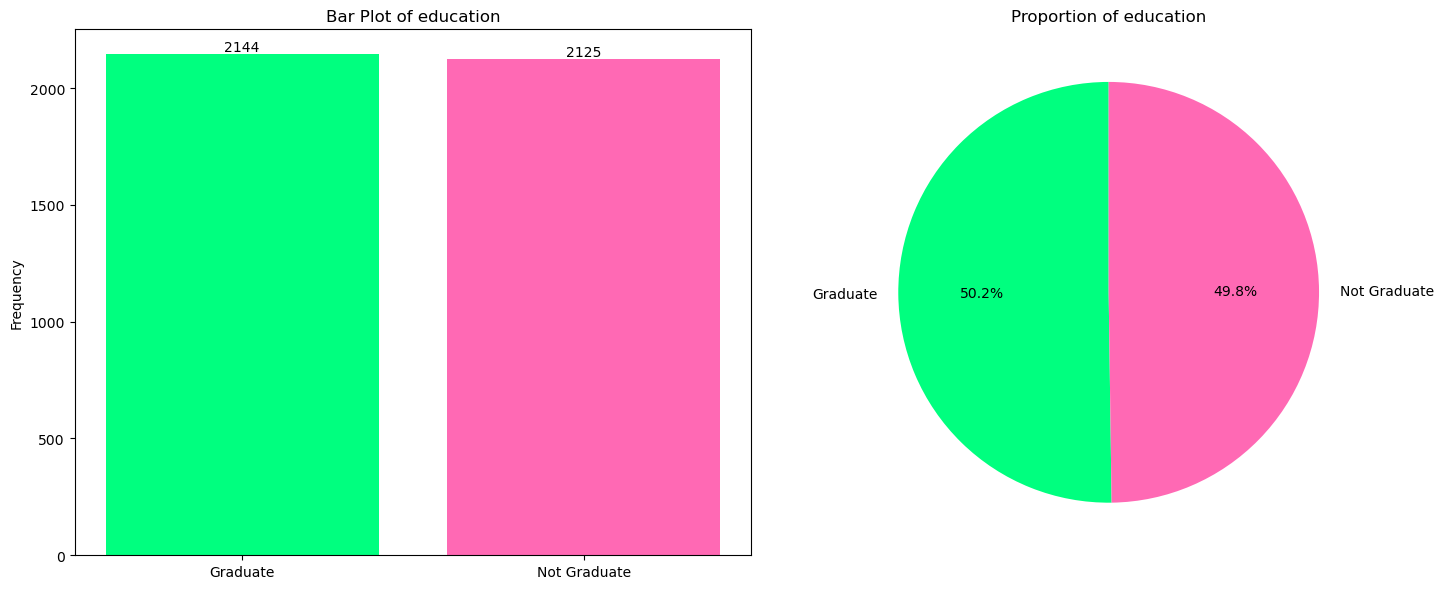

In [342]:
# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# barplot
dpnm_counts = df["education"].value_counts()
barplot = ax1.bar(dpnm_counts.index, dpnm_counts.values, color=["springgreen", "hotpink"])

# label barplot
for bar, count in zip(barplot, dpnm_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha="center", va="bottom")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Graduate", "Not Graduate"])
ax1.set_ylabel("Frequency")
ax1.set_title("Bar Plot of education")

# pie chart
dpnm_labels = ["Graduate", "Not Graduate"]
dpnm_sizes = df["education"].value_counts().values
ax2.pie(dpnm_sizes, labels=dpnm_labels, autopct="%1.1f%%", colors=["springgreen", "hotpink"], startangle=90)

# label peichart
ax2.set_title("Proportion of education")

# show plot
plt.tight_layout()
plt.show()

insight:
- education terdiri dari Graduate dan Not Graduate
- proporsi antara Graduate dan Not Graduate cukup hampir seimbang dengan Graduate sedikit lebih banyak 0.4% (19 data)

### 4.3.3. self_employed

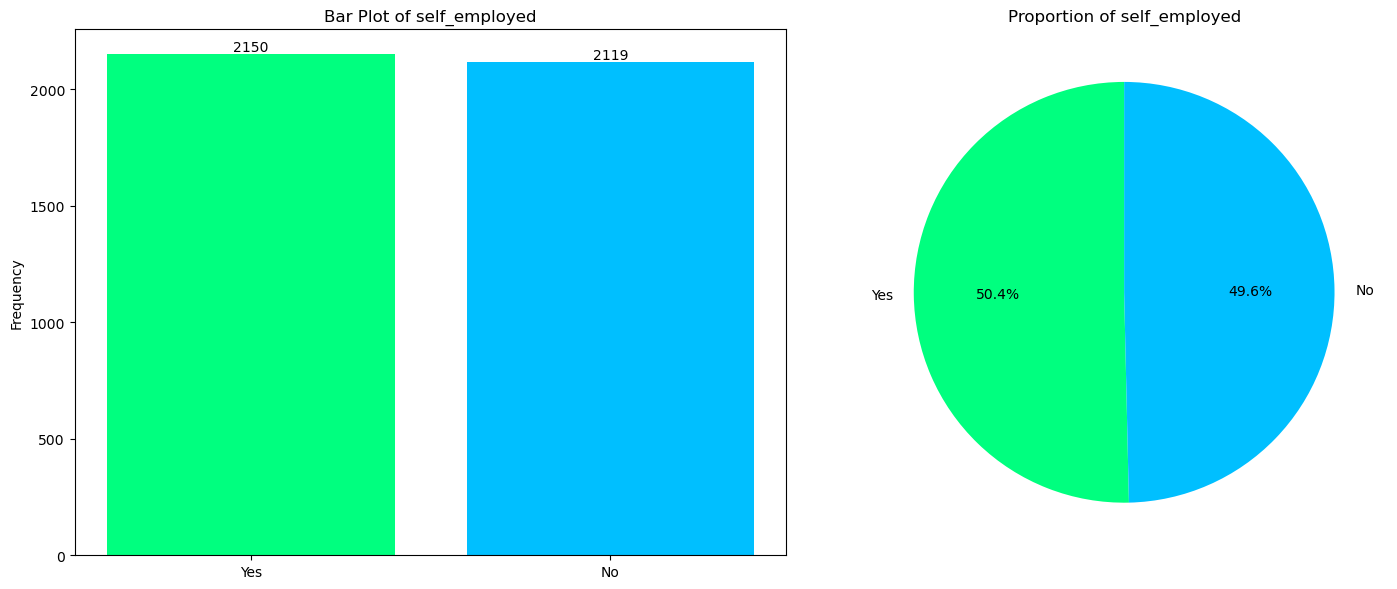

In [343]:
# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# barplot
dpnm_counts = df["self_employed"].value_counts()
barplot = ax1.bar(dpnm_counts.index, dpnm_counts.values, color=["springgreen", "deepskyblue"])

# label barplot
for bar, count in zip(barplot, dpnm_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha="center", va="bottom")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Yes", "No"])
ax1.set_ylabel("Frequency")
ax1.set_title("Bar Plot of self_employed")

# pie chart
dpnm_labels = ["Yes", "No"]
dpnm_sizes = df["self_employed"].value_counts().values
ax2.pie(dpnm_sizes, labels=dpnm_labels, autopct="%1.1f%%", colors=["springgreen", "deepskyblue"], startangle=90)

# label peichart
ax2.set_title("Proportion of self_employed")

# show plot
plt.tight_layout()
plt.show()

insight:
- self_employed terdiri dari Yes dan No
- proporsi antara wiraswasta dan bukan wiraswasta hampir seimbang dengan wiraswasta sedikit lebih banyak 8% (31 data)

### 4.3.4. income_annum

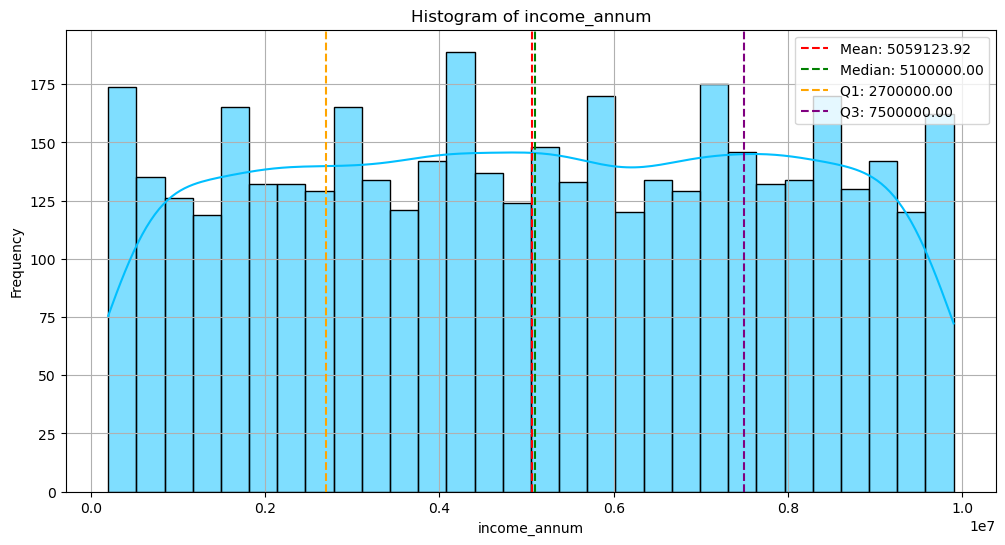

In [344]:
# statistic
mean_income_annum = df["income_annum"].mean()
median_income_annum = df["income_annum"].median()
q1_income_annum = df["income_annum"].quantile(0.25)
q3_income_annum = df["income_annum"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["income_annum"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_income_annum, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_income_annum:.2f}")
plt.axvline(median_income_annum, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_income_annum:.2f}")
plt.axvline(q1_income_annum, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_income_annum:.2f}")
plt.axvline(q3_income_annum, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_income_annum:.2f}")

# label
plt.title("Histogram of income_annum")
plt.xlabel("income_annum")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- rentang income_annum mulai dari 200,000 hingga 9,900,000
- sebaran data cenderung merata dengan beberapa titik yang lebih tinggi dari pada yang lain

### 4.3.5. loan_amount

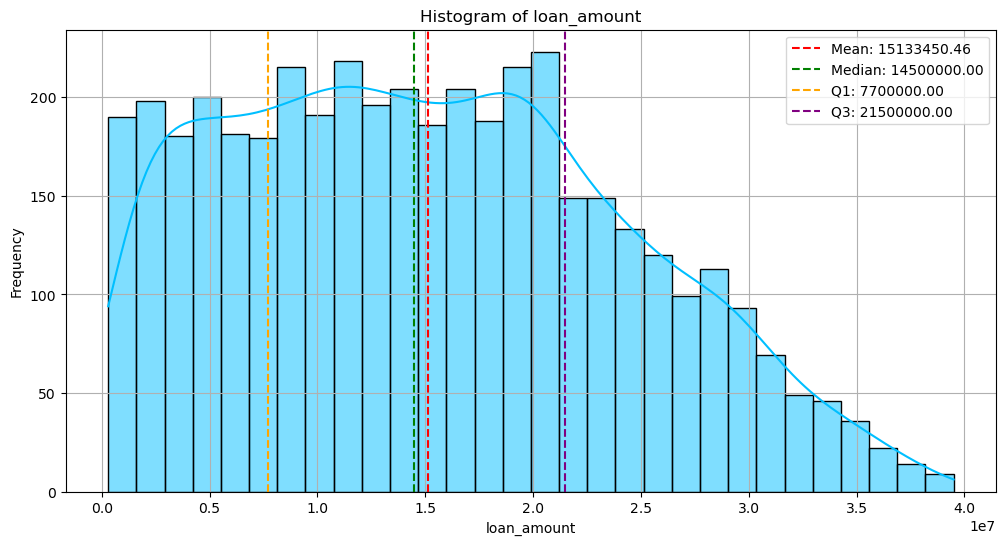

In [345]:
# statistic
mean_loan_amount = df["loan_amount"].mean()
median_loan_amount = df["loan_amount"].median()
q1_loan_amount = df["loan_amount"].quantile(0.25)
q3_loan_amount = df["loan_amount"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["loan_amount"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_loan_amount, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_loan_amount:.2f}")
plt.axvline(median_loan_amount, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_loan_amount:.2f}")
plt.axvline(q1_loan_amount, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_loan_amount:.2f}")
plt.axvline(q3_loan_amount, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_loan_amount:.2f}")

# label
plt.title("Histogram of loan_amount")
plt.xlabel("loan_amount")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- rentang loan_amount mulai dari 300,000 hingga 39,500,000
- jumlah nominal pinjaman cenderung merata pada sekitar 300,000 hingga 2,100,000 dan berangsur berkurang frekuensinya ketika menuju nominal yang lebih besar

### 4.3.6. loan_term

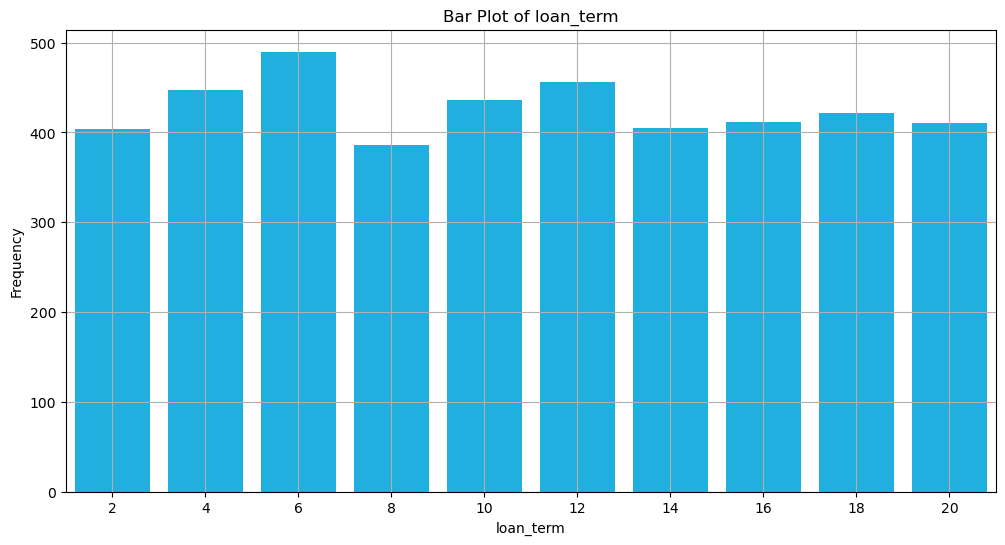

In [346]:
# unique value counts loan_term
value_counts = df["loan_term"].value_counts().sort_index()

# plot
plt.figure(figsize=(12,6))
sns.barplot(x=value_counts.index, y=value_counts.values, color="deepskyblue")

# label
plt.title("Bar Plot of loan_term")
plt.xlabel("loan_term")
plt.ylabel("Frequency")

# show plot
plt.grid(True)
plt.show()

insight:
- rentang loan_term mulai dari 2 hingga 20 bulan
- sebaran loan_term cenderung merata dengan frekuensi sedikit lebih banyak di 6 bulan

### 4.3.7. cibil_score

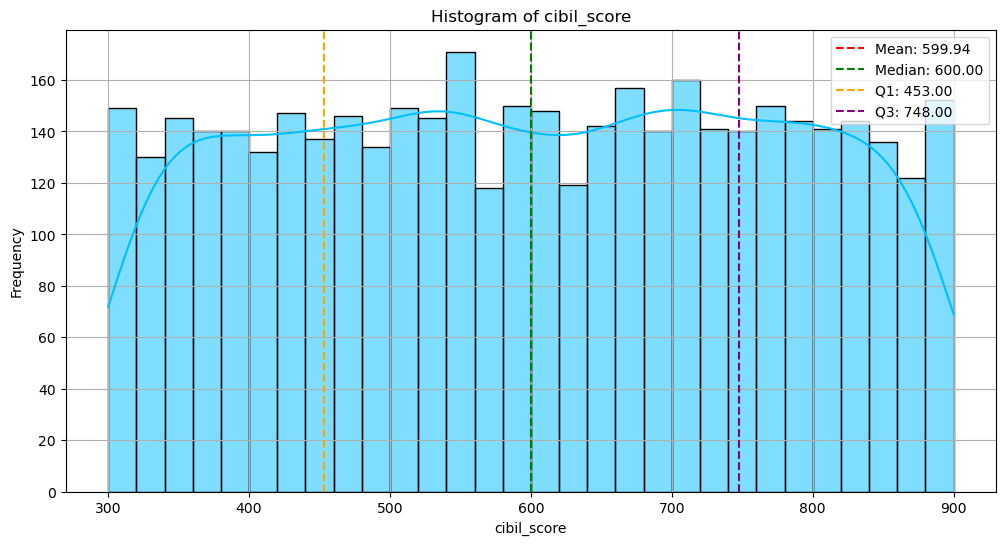

In [347]:
# statistic
mean_cibil_score = df["cibil_score"].mean()
median_cibil_score = df["cibil_score"].median()
q1_cibil_score = df["cibil_score"].quantile(0.25)
q3_cibil_score = df["cibil_score"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["cibil_score"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_cibil_score, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_cibil_score:.2f}")
plt.axvline(median_cibil_score, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_cibil_score:.2f}")
plt.axvline(q1_cibil_score, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_cibil_score:.2f}")
plt.axvline(q3_cibil_score, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_cibil_score:.2f}")

# label
plt.title("Histogram of cibil_score")
plt.xlabel("cibil_score")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- rentang cibil_score mulai dari 300 hingga 900
- sebaran cibil_score cenderung merata dengan frekuensi lebih banyak pada sekitar 550

### 4.3.8. residential_assets_value

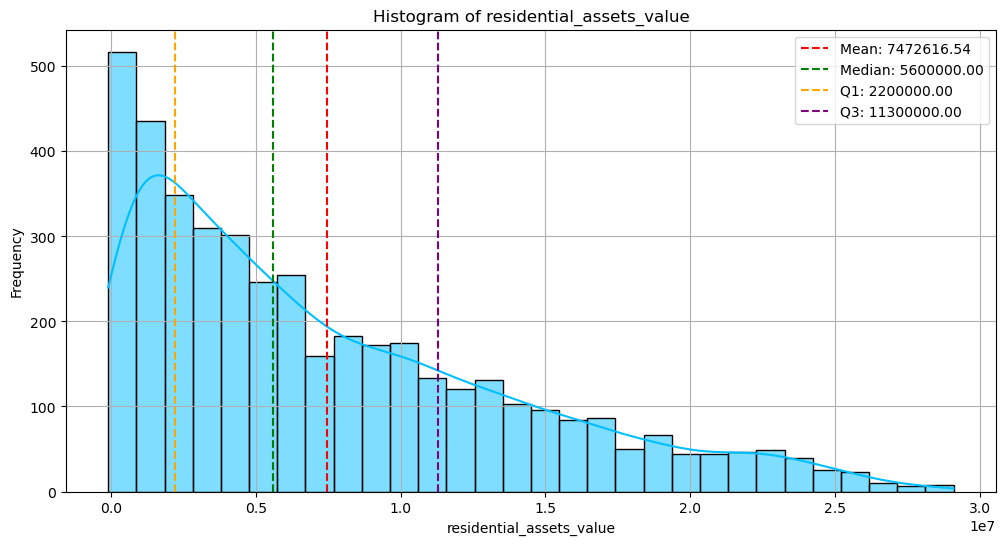

In [348]:
# statistic
mean_residential_assets_value = df["residential_assets_value"].mean()
median_residential_assets_value = df["residential_assets_value"].median()
q1_residential_assets_value = df["residential_assets_value"].quantile(0.25)
q3_residential_assets_value = df["residential_assets_value"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["residential_assets_value"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_residential_assets_value, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_residential_assets_value:.2f}")
plt.axvline(median_residential_assets_value, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_residential_assets_value:.2f}")
plt.axvline(q1_residential_assets_value, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_residential_assets_value:.2f}")
plt.axvline(q3_residential_assets_value, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_residential_assets_value:.2f}")

# label
plt.title("Histogram of residential_assets_value")
plt.xlabel("residential_assets_value")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- rentang residential_assets_value mulai dari -100.000 hingga 29,100,000
- sebaran residential_assets_value cenderung banyak pada nominal kecil sekitar 0 hingga 2,000,000 dan berangsur menurun menuju nominal yang besar

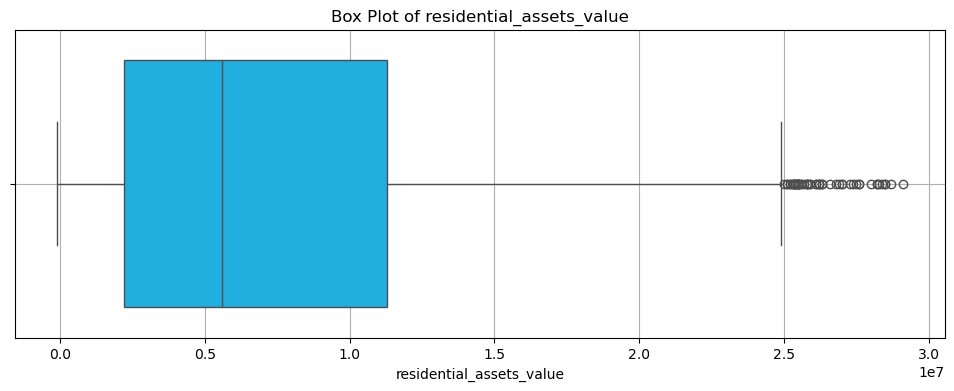

In [349]:
# boxplot
plt.figure(figsize=(12,4))
sns.boxplot(x=df["residential_assets_value"], color="deepskyblue")

# label
plt.title("Box Plot of residential_assets_value")
plt.xlabel("residential_assets_value")

# show plot
plt.grid(True)
plt.show()

insight:
- titik-titik di sebelah kanan boxplot kemungkinan outliers dengan nilai yang besar

### 4.3.9. commercial_assets_value

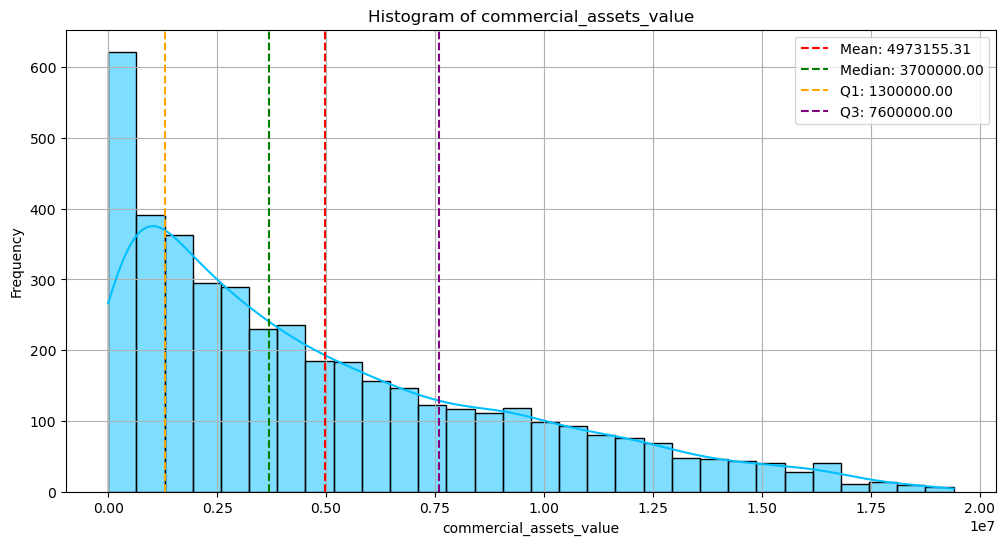

In [350]:
# statistic
mean_commercial_assets_value = df["commercial_assets_value"].mean()
median_commercial_assets_value = df["commercial_assets_value"].median()
q1_commercial_assets_value = df["commercial_assets_value"].quantile(0.25)
q3_commercial_assets_value = df["commercial_assets_value"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["commercial_assets_value"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_commercial_assets_value, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_commercial_assets_value:.2f}")
plt.axvline(median_commercial_assets_value, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_commercial_assets_value:.2f}")
plt.axvline(q1_commercial_assets_value, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_commercial_assets_value:.2f}")
plt.axvline(q3_commercial_assets_value, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_commercial_assets_value:.2f}")

# label
plt.title("Histogram of commercial_assets_value")
plt.xlabel("commercial_assets_value")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- rentang commercial_assets_value mulai dari 0 hingga 19,400,000
- sebaran commercial_assets_value cenderung banyak pada nominal kecil sekitar 0 hingga 1,000,000 dan berangsur menurun menuju nominal yang besar

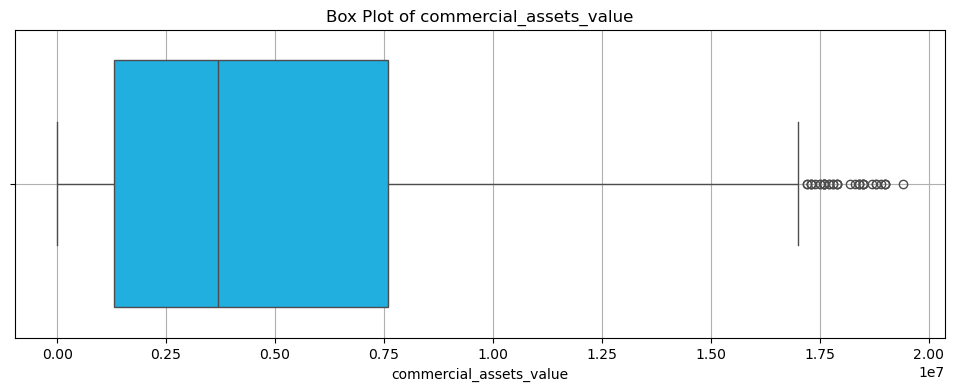

In [351]:
# boxplot
plt.figure(figsize=(12,4))
sns.boxplot(x=df["commercial_assets_value"], color="deepskyblue")

# label
plt.title("Box Plot of commercial_assets_value")
plt.xlabel("commercial_assets_value")

# show plot
plt.grid(True)
plt.show()

insight:
- titik-titik di sebelah kanan boxplot kemungkinan outliers dengan nilai yang besar

### 4.3.10. luxury_assets_value

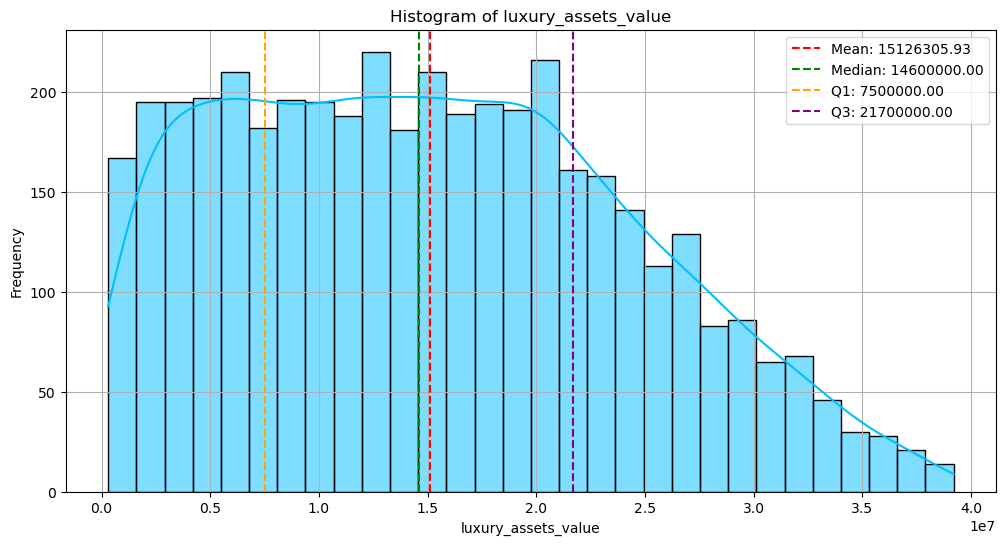

In [352]:
# statistic
mean_luxury_assets_value = df["luxury_assets_value"].mean()
median_luxury_assets_value = df["luxury_assets_value"].median()
q1_luxury_assets_value = df["luxury_assets_value"].quantile(0.25)
q3_luxury_assets_value = df["luxury_assets_value"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["luxury_assets_value"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_luxury_assets_value, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_luxury_assets_value:.2f}")
plt.axvline(median_luxury_assets_value, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_luxury_assets_value:.2f}")
plt.axvline(q1_luxury_assets_value, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_luxury_assets_value:.2f}")
plt.axvline(q3_luxury_assets_value, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_luxury_assets_value:.2f}")

# label
plt.title("Histogram of luxury_assets_value")
plt.xlabel("luxury_assets_value")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- rentang luxury_assets_value mulai dari 300,000 hingga 39,200,000
- luxury_assets_value cenderung merata pada sekitar 300,000 hingga 20,000,000 dan berangsur berkurang frekuensinya ketika menuju nominal yang lebih besar

### 4.3.11. bank_asset_value

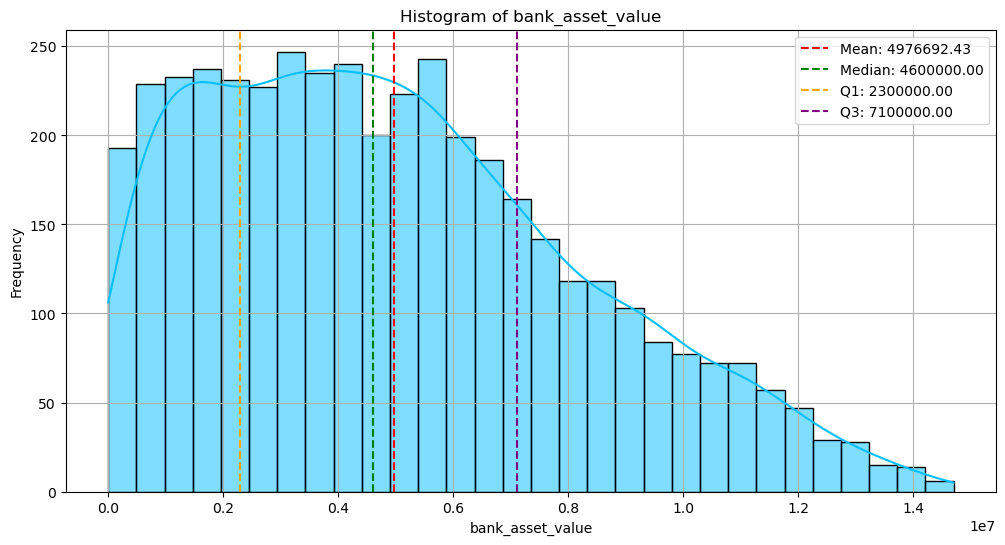

In [353]:
# statistic
mean_bank_asset_value = df["bank_asset_value"].mean()
median_bank_asset_value = df["bank_asset_value"].median()
q1_bank_asset_value = df["bank_asset_value"].quantile(0.25)
q3_bank_asset_value = df["bank_asset_value"].quantile(0.75)

# plot
plt.figure(figsize=(12,6))
sns.histplot(df["bank_asset_value"], bins=30, kde=True, color="deepskyblue")

# median, mean, Q1, Q3 lines
plt.axvline(mean_bank_asset_value, color="red", linestyle="dashed", linewidth=1.5, label=f"Mean: {mean_bank_asset_value:.2f}")
plt.axvline(median_bank_asset_value, color="green", linestyle="dashed", linewidth=1.5, label=f"Median: {median_bank_asset_value:.2f}")
plt.axvline(q1_bank_asset_value, color="orange", linestyle="dashed", linewidth=1.5, label=f"Q1: {q1_bank_asset_value:.2f}")
plt.axvline(q3_bank_asset_value, color="purple", linestyle="dashed", linewidth=1.5, label=f"Q3: {q3_bank_asset_value:.2f}")

# label
plt.title("Histogram of bank_asset_value")
plt.xlabel("bank_asset_value")
plt.ylabel("Frequency")
plt.legend()

# show plot
plt.grid(True)
plt.show()

insight:
- rentang bank_asset_value mulai dari 0 hingga 14,700,000
- luxury_assets_value cenderung merata pada sekitar 0 hingga 6,000,000 dan berangsur berkurang frekuensinya ketika menuju nominal yang lebih besar

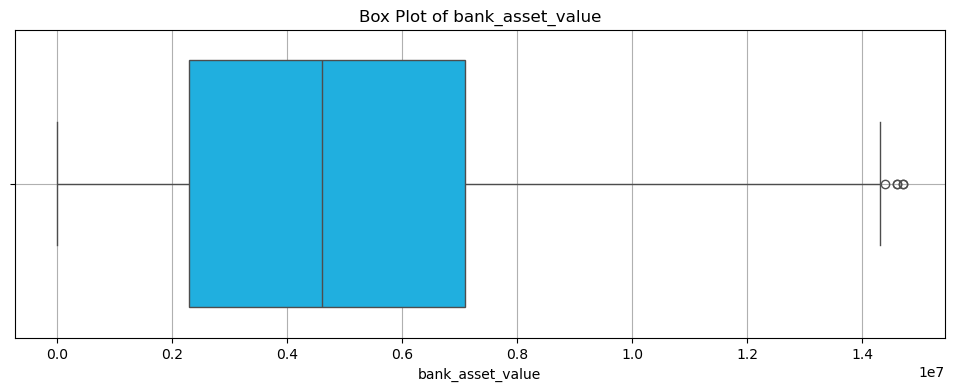

In [354]:
# boxplot
plt.figure(figsize=(12,4))
sns.boxplot(x=df["bank_asset_value"], color="deepskyblue")

# label
plt.title("Box Plot of bank_asset_value")
plt.xlabel("bank_asset_value")

# show plot
plt.grid(True)
plt.show()

insight:
- titik-titik di sebelah kanan boxplot kemungkinan outliers dengan nilai yang besar

### 4.3.12. loan_status

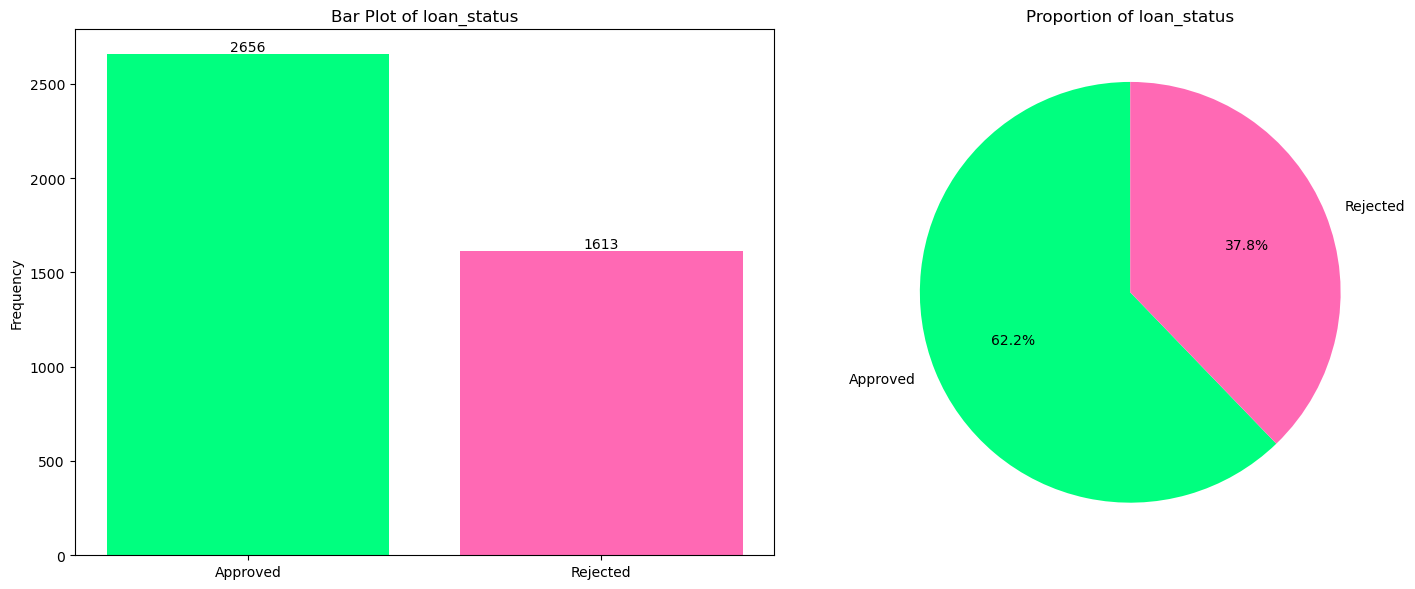

In [355]:
# figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# barplot
dpnm_counts = df["loan_status"].value_counts()
barplot = ax1.bar(dpnm_counts.index, dpnm_counts.values, color=["springgreen", "hotpink"])

# label barplot
for bar, count in zip(barplot, dpnm_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha="center", va="bottom")
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Approved", "Rejected"])
ax1.set_ylabel("Frequency")
ax1.set_title("Bar Plot of loan_status")

# pie chart
dpnm_labels = ["Approved", "Rejected"]
dpnm_sizes = df["loan_status"].value_counts().values
ax2.pie(dpnm_sizes, labels=dpnm_labels, autopct="%1.1f%%", colors=["springgreen", "hotpink"], startangle=90)

# label peichart
ax2.set_title("Proportion of loan_status")

# show plot
plt.tight_layout()
plt.show()

insight:
- loan_status terdiri dari Approved dan Rejected
- frekuensi value Approved memiliki proporsi lebih banyak dengan persentase 62.2% (2,656 data)
- sebagai data target proporsi ini termasuk tidak seimbang

## 4.4. Skewness

In [356]:
# df numeric column
df_num_col = ["no_of_dependents", "income_annum",
               "loan_amount", "loan_term", "cibil_score",
               "residential_assets_value", "commercial_assets_value",
               "luxury_assets_value", "bank_asset_value"]

# init
columns = []
skewness_values = []
skew_desc = []

# loop skewness
for col in df_num_col:
    skew = df[col].skew()
    columns.append(col)
    skewness_values.append(skew)
    if skew >= 0.5 or skew <= -0.5:
        skew_desc.append("skew")
    else:
        skew_desc.append("normal")

skewness_df = pd.DataFrame({"Column": columns,
                            "Skewness": skewness_values,
                            "Skew Desc": skew_desc})
# show skewness_df
skewness_df

Column  Skewness Skew Desc
0          no_of_dependents -0.017971    normal
1              income_annum -0.012814    normal
2               loan_amount  0.308724    normal
3                 loan_term  0.036359    normal
4               cibil_score -0.009039    normal
5  residential_assets_value  0.978451      skew
6   commercial_assets_value  0.957791      skew
7       luxury_assets_value  0.322208    normal
8          bank_asset_value  0.560725      skew

insight:
- data residential_assets_value, commercial_assets_value dan bank_asset_value memiliki distribusi skew

## 4.5. Correlation

In [357]:
# categorical column
df_cat_col = ["loan_status", "education", "self_employed"]

label_encoders = {}
for col in df_cat_col:
    label_encoders[col] = LabelEncoder()

# loop LabelEncoder categorical column
for col in df_cat_col:
    encoder = label_encoders[col]
    df[col] = encoder.fit_transform(df[col])

# correlation matrix using kendall tau
df_corr = df.corr(method="kendall")
df_corr

loan_id  no_of_dependents  education  \
loan_id                   1.000000          0.003902  -0.012687   
no_of_dependents          0.003902          1.000000  -0.002475   
education                -0.012687         -0.002475   1.000000   
self_employed             0.001425          0.000634   0.023224   
income_annum              0.008846          0.005274  -0.009571   
loan_amount               0.008495         -0.000868  -0.007455   
loan_term                 0.006665         -0.015434   0.007464   
cibil_score               0.010803         -0.007294   0.003723   
residential_assets_value  0.017477          0.008241  -0.011443   
commercial_assets_value   0.014328          0.002969  -0.000154   
luxury_assets_value       0.001038          0.003505  -0.012073   
bank_asset_value          0.010076          0.009666  -0.010014   
loan_status              -0.014441          0.015977   0.004918   

                          self_employed  income_annum  loan_amount  loan_term  \
loan_id                        0.001425      0.008846     0.008495   0.006665   
no_of_dependents               0.000634      0.005274    -0.000868  -0.015434   
education                      0.023224     -0.009571    -0.007455   0.007464   
self_employed                  1.000000      0.002076    -0.001393   0.003850   
income_annum                   0.002076      1.000000     0.799941   0.008049   
loan_amount                   -0.001393      0.799941     1.000000   0.007987   
loan_term                      0.003850      0.008049     0.007987   1.000000   
cibil_score                   -0.003915     -0.015332    -0.013207   0.005564   
residential_assets_value       0.001378      0.478956     0.451342   0.001844   
commercial_assets_value       -0.017643      0.485424     0.459175  -0.000735   
luxury_assets_value            0.001852      0.803105     0.723827   0.005925   
bank_asset_value               0.002432      0.709264     0.655066   0.010015   
loan_status                   -0.000345      0.012359    -0.010251   0.098275   

                          cibil_score  residential_assets_value  \
loan_id                      0.010803                  0.017477   
no_of_dependents            -0.007294                  0.008241   
education                    0.003723                 -0.011443   
self_employed               -0.003915                  0.001378   
income_annum                -0.015332                  0.478956   
loan_amount                 -0.013207                  0.451342   
loan_term                    0.005564                  0.001844   
cibil_score                  1.000000                 -0.020850   
residential_assets_value    -0.020850                  1.000000   
commercial_assets_value     -0.001049                  0.318307   
luxury_assets_value         -0.019873                  0.450610   
bank_asset_value            -0.013222                  0.413895   
loan_status                 -0.630695                  0.013445   

                          commercial_assets_value  luxury_assets_value  \
loan_id                                  0.014328             0.001038   
no_of_dependents                         0.002969             0.003505   
education                               -0.000154            -0.012073   
self_employed                           -0.017643             0.001852   
income_annum                             0.485424             0.803105   
loan_amount                              0.459175             0.723827   
loan_term                               -0.000735             0.005925   
cibil_score                             -0.001049            -0.019873   
residential_assets_value                 0.318307             0.450610   
commercial_assets_value                  1.000000             0.456307   
luxury_assets_value                      0.456307             1.000000   
bank_asset_value                         0.429852             0.652742   
loan_status                             -0.007398   

In [358]:
# loan_status correlation sorted
df_corr["loan_status"].sort_values(ascending=True)

cibil_score                -0.630695
loan_id                    -0.014441
loan_amount                -0.010251
commercial_assets_value    -0.007398
self_employed              -0.000345
education                   0.004918
bank_asset_value            0.008174
income_annum                0.012359
residential_assets_value    0.013445
luxury_assets_value         0.014113
no_of_dependents            0.015977
loan_term                   0.098275
loan_status                 1.000000
Name: loan_status, dtype: float64

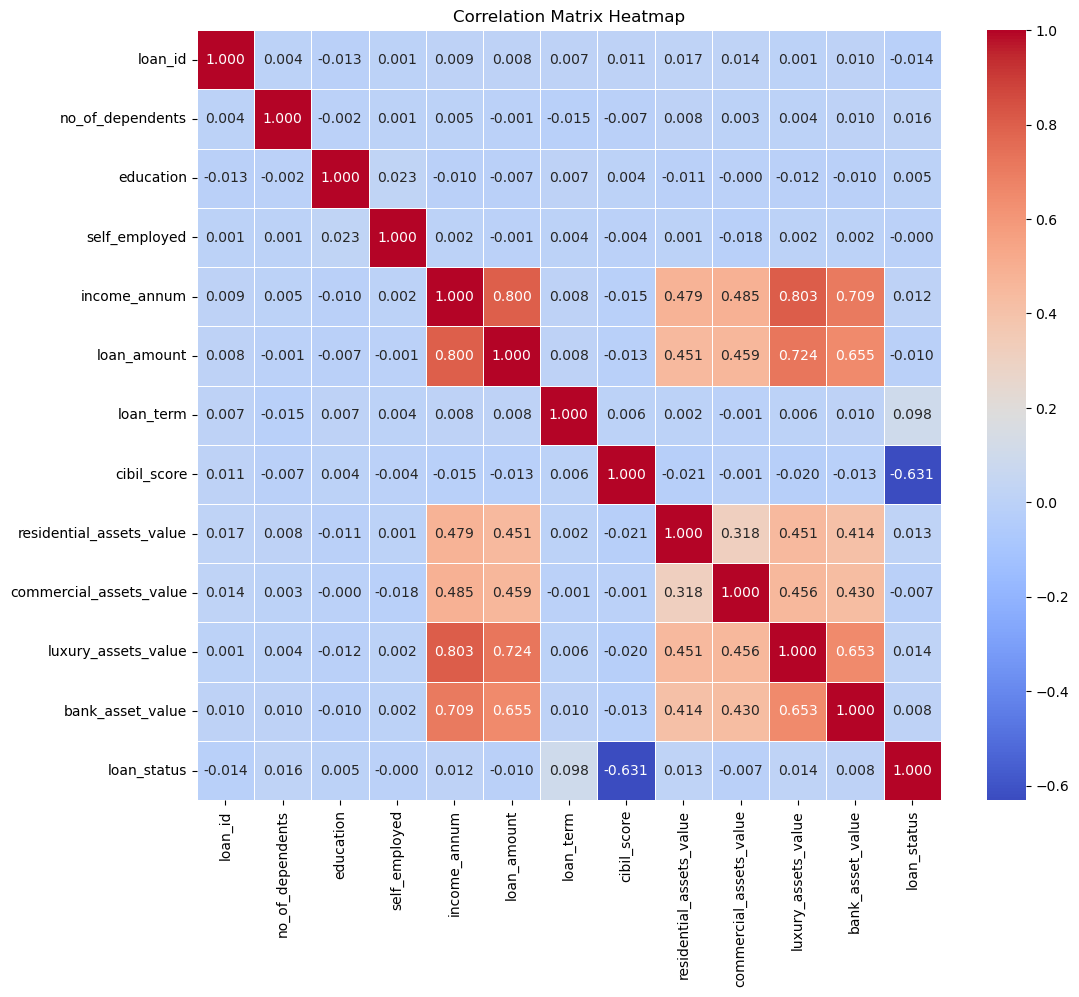

In [359]:
# heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)

# label
plt.title("Correlation Matrix Heatmap")

# show plot
plt.show()

insight:
- cibil_score memiliki korelasi negatif yang kuat dengan loan_status (-0.630695)
- loan_term memiliki korelasi positif yang rendah dengan loan_status (0.098275)
- no_of_dependents memiliki korelasi positif yang sangat rendah dengan loan_status (0.015977)
- income_annum memiliki korelasi positif yang sangat rendah dengan loan_status (0.012359)
- korelasi antara berbagai jenis aset (residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value) dengan loan_status sangat rendah
- kemungkinan cibil_score adalah faktor yang berpengaruh besar terhadap keputusan loan_status
- self_employed dan education merupakan 2 terbawah kurang memiliki korelasi dengan loan_status

## 4.6. EDA Conclusion

- Dataset berisi informasi tentang profil individu, income, asset dan ajuan peminjaman dana dari nasabah.
- Dataset ini memberikan wawasan tentang finansial dan aset para pengaju pinjaman.
- Distribusi masing-masing kolom relatif normal namun ada kemungkinan beberapa kolom terdistribusi tidak normal dan memiliki outliers
- cibil_score memiliki korelasi negatif yang signifikan terhadap loan_status
- self_employed dan education memiliki value korelasi yang sangat rendah terhadap loan_status mungkin bisa dibilang tidak memiliki korelasi
- Berdasarkan informasi tersebut akan dilakukan pemodelan classification untuk memprediksi apakah ajuan pinjaman disetujui atau tidak berdasarkan profil, finansial dan aset pengaju pinjaman.

# 5. Feature Engineering

In [360]:
# copy df to dataframe named df_model
df_model = df_ori.copy()

## 5.1. Feature Selection

Feature untuk model akan menggunakan kolom berikut:
1. loan_status
2. no_of_dependents
3. income_annum
4. loan_amount
5. loan_term
6. cibil_score
7. residential_assets_value
8. commercial_assets_value
9. luxury_assets_value
10. bank_asset_value

self_employed dan education tidak digunakan sebagai feature karena merupakan 2 terbawah yang sangat kurang memiliki korelasi dengan loan_status

In [361]:
# select columns for feature
df_model = df_model[['no_of_dependents', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']]

selector = [
    ("selector", ColumnTransformer([
        ("select", "passthrough", df_model.columns.tolist()[:9])
    ]))
]

# create pipeline selector
selector = Pipeline(selector)

In [362]:
# show df_model
df_model

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                    2       9600000     29900000         12          778   
1                    0       4100000     12200000          8          417   
2                    3       9100000     29700000         20          506   
3                    3       8200000     30700000          8          467   
4                    5       9800000     24200000         20          382   
...                ...           ...          ...        ...          ...   
4264                 5       1000000      2300000         12          317   
4265                 0       3300000     11300000         20          559   
4266                 2       6500000     23900000         18          457   
4267                 1       4100000     12800000          8          780   
4268                 1       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2                      7100000                  4500000             33300000   
3                     18200000                  3300000             23300000   
4                     12400000                  8200000             29400000   
...                        ...                      ...                  ...   
4264                   2800000                   500000              3300000   
4265                   4200000                  2900000             11000000   
4266                   1200000                 12400000             18100000   
4267                   8200000                   700000             14100000   
4268                  17800000                 11800000             35700000   

      bank_asset_value loan_status  
0              8000000    Approved  
1              3300000    Rejected  
2             12800000    Rejected  
3              7900000    Rejected  
4              5000000    Rejected  
...                ...         ...  
4264            800000    Rejected  
4265           1900000    Approved  
4266           7300000    Rejected  
4267           5800000    Approved  
4268          12000000    Approved  

[4269 rows x 10 columns]

## 5.2. Split Features (X) and Target (Y)

In [363]:
# feature
X = df_model.drop("loan_status", axis=1)

# target
y = df_model["loan_status"]

In [364]:
# shape feature
print("feature  :", X.shape)
# shape target
print("target   :", y.shape)

feature  : (4269, 9)
target   : (4269,)


In [365]:
# show feature
X

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                    2       9600000     29900000         12          778   
1                    0       4100000     12200000          8          417   
2                    3       9100000     29700000         20          506   
3                    3       8200000     30700000          8          467   
4                    5       9800000     24200000         20          382   
...                ...           ...          ...        ...          ...   
4264                 5       1000000      2300000         12          317   
4265                 0       3300000     11300000         20          559   
4266                 2       6500000     23900000         18          457   
4267                 1       4100000     12800000          8          780   
4268                 1       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2                      7100000                  4500000             33300000   
3                     18200000                  3300000             23300000   
4                     12400000                  8200000             29400000   
...                        ...                      ...                  ...   
4264                   2800000                   500000              3300000   
4265                   4200000                  2900000             11000000   
4266                   1200000                 12400000             18100000   
4267                   8200000                   700000             14100000   
4268                  17800000                 11800000             35700000   

      bank_asset_value  
0              8000000  
1              3300000  
2             12800000  
3              7900000  
4              5000000  
...                ...  
4264            800000  
4265           1900000  
4266           7300000  
4267           5800000  
4268          12000000  

[4269 rows x 9 columns]

In [366]:
# target value count
y.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

## 5.3. Split Train and Test Set

In [367]:
# split train and test set
random_state = 13
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=random_state)

# show X_train
X_train

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
640                  3       4600000     17800000         20          716   
409                  5       3000000     11800000          6          847   
1063                 0        800000      1700000          4          752   
25                   5       3100000      9500000         20          514   
3457                 4       8600000     20900000         10          867   
...                ...           ...          ...        ...          ...   
153                  2       1300000      4500000          6          415   
866                  0       8900000     23000000         12          741   
2790                 0       1000000      3000000         18          382   
74                   2       2600000      8400000          6          494   
338                  3       6800000     16900000         18          628   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
640                   12600000                  2600000             10800000   
409                    8200000                  2200000              7100000   
1063                   2300000                  1100000              3200000   
25                     7900000                  3100000              6600000   
3457                  24300000                  7200000             23700000   
...                        ...                      ...                  ...   
153                          0                   900000              2900000   
866                    5600000                 11200000             27100000   
2790                   2200000                   700000              3500000   
74                     6500000                  3800000              5600000   
338                    3600000                   900000             15600000   

      bank_asset_value  
640            4500000  
409            2300000  
1063            400000  
25             2600000  
3457           9900000  
...                ...  
153            1200000  
866            7100000  
2790            900000  
74             2000000  
338            4900000  

[3415 rows x 9 columns]

In [368]:
# check shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3415, 9)
(3415,)
(854, 9)
(854,)


## 5.4. Handling Outliers

In [369]:
# init col to check
columns_to_check = X_train.columns

# init col_outliers
col_outliers = []

# init df_outliers
df_outliers = pd.DataFrame()

print("Outliers Overview:")
print("")

for col in columns_to_check:
    print(col)

    # skewness
    skew_col = X_train[col].skew()
    print(f"skewness {col}       = {skew_col}")
    if skew_col > 0.5 or skew_col < -0.5:
        print("distribusi skew")
    else:
        print("distribusi normal")

    # q1 q3 iqr
    q1_col = X_train[col].quantile(0.25)
    q3_col = X_train[col].quantile(0.75)
    iqr_col = q3_col - q1_col

    # lower upper boundary
    ub_col = q3_col + 1.5 * iqr_col
    lb_col = q1_col - 1.5 * iqr_col

    print(f"upper boundary {col} = {ub_col}")
    print(f"lower boundary {col} = {lb_col}")

    # outliers
    outlier_col = X_train[col][(X_train[col] < lb_col) | (X_train[col] > ub_col)]

    if len(outlier_col) > 0:
        # count and percentage of outliers
        persentase_outliers = len(outlier_col) / len(X_train[col]) * 100
        print(f"terdapat outliers sebanyak {len(outlier_col)} row")
        print(f"dengan persentase {(persentase_outliers):.2f}%")

        # min max outliers
        min_outlier_col = outlier_col.min()
        max_outlier_col = outlier_col.max()
        print(f"min outlier_{col} = {min_outlier_col}")
        print(f"max outlier_{col} = {max_outlier_col}")

        col_outliers.append({"column": col, "outliers": len(outlier_col), "%": f"{persentase_outliers:.2f}"})
        df_outliers = pd.concat([df_outliers, outlier_col], axis=1)
    else:
        print(f"tidak ada outliers untuk kolom {col}")

    print("")

# col_outliers to dataframe
col_outliers = pd.DataFrame(col_outliers)


Outliers Overview:

no_of_dependents
skewness no_of_dependents       = 0.000275516442263937
distribusi normal
upper boundary no_of_dependents = 8.5
lower boundary no_of_dependents = -3.5
tidak ada outliers untuk kolom no_of_dependents

income_annum
skewness income_annum       = -0.018651432892505655
distribusi normal
upper boundary income_annum = 14850000.0
lower boundary income_annum = -4750000.0
tidak ada outliers untuk kolom income_annum

loan_amount
skewness loan_amount       = 0.30608750472073737
distribusi normal
upper boundary loan_amount = 41825000.0
lower boundary loan_amount = -12775000.0
tidak ada outliers untuk kolom loan_amount

loan_term
skewness loan_term       = 0.058135527549168724
distribusi normal
upper boundary loan_term = 31.0
lower boundary loan_term = -9.0
tidak ada outliers untuk kolom loan_term

cibil_score
skewness cibil_score       = -0.026292960723018993
distribusi normal
upper boundary cibil_score = 1190.0
lower boundary cibil_score = 14.0
tidak ada outlier

In [370]:
# show column has an outliers
col_outliers

column  outliers     %
0  residential_assets_value        41  1.20
1   commercial_assets_value        28  0.82
2          bank_asset_value         5  0.15

insight:
- terdapat sedikit outliers pada residential_assets_value (41 data), commercial_assets_value (28 data), bank_asset_value (5 data)
- outliers akan dihandling menggunakan capping

In [371]:
# preview outliers data
df_outliers

residential_assets_value  commercial_assets_value  bank_asset_value
4237                26200000.0                      NaN               NaN
2586                28000000.0                      NaN               NaN
1625                26300000.0                      NaN               NaN
2715                25800000.0                      NaN               NaN
1591                28500000.0                      NaN               NaN
...                        ...                      ...               ...
3790                       NaN               18400000.0               NaN
1674                       NaN                      NaN        14600000.0
1633                       NaN                      NaN        14600000.0
200                        NaN                      NaN        14400000.0
1805                       NaN                      NaN        14700000.0

[73 rows x 3 columns]

In [372]:
# preview X_train outliers
X_train_outliers = X_train.loc[X_train.index.isin(df_outliers.index)]
X_train_outliers

no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
4237                 0       9100000     30100000          8          322   
2586                 1       9800000     36000000         12          629   
1625                 2       9900000     33200000          4          465   
1272                 5       9900000     35800000         20          470   
895                  0       9400000     27900000          6          456   
...                ...           ...          ...        ...          ...   
554                  3       9500000     22800000          6          319   
1002                 5       9600000     20700000         14          442   
4120                 3       9100000     19900000          2          711   
123                  0       9000000     18700000         18          865   
3790                 1       9600000     32400000         20          447   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
4237                  26200000                  9500000             18800000   
2586                  28000000                  4100000             29800000   
1625                  26300000                 17000000             24400000   
1272                   9500000                 18400000             39100000   
895                   21400000                 18500000             35600000   
...                        ...                      ...                  ...   
554                     200000                 18800000             34100000   
1002                  25800000                  9800000             31800000   
4120                   2200000                 17900000             24300000   
123                   26800000                        0             20900000   
3790                  15400000                 18400000             19800000   

      bank_asset_value  
4237           5900000  
2586          11200000  
1625           5000000  
1272          14700000  
895            7800000  
...                ...  
554            9400000  
1002           8200000  
4120          13000000  
123           11300000  
3790           4700000  

[73 rows x 9 columns]

In [373]:
# handling outliers with capping
from feature_engine.outliers import Winsorizer
windsoriser = Winsorizer(capping_method="iqr",
                          tail="both",
                          fold=1.5,
                          variables=X_train.columns.to_list())

X_train = windsoriser.fit_transform(X_train)

In [374]:
# check shape
print(X_train.shape)
print(y_train.shape)

(3415, 9)
(3415,)


## 5.5. Data Balancing

In [375]:
# check target proportion
y_train.value_counts()

loan_status
Approved    2148
Rejected    1267
Name: count, dtype: int64

insight:
- karena data train set termasuk tidak seimbang maka akan dilakukan balancing data dengan over sample data minoritas

In [376]:
# smote over sample minor data
smote = SMOTE(sampling_strategy="minority", k_neighbors=5, random_state=random_state)

# smote train set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# check value count after smote
y_train_balanced.value_counts()

loan_status
Approved    2148
Rejected    2148
Name: count, dtype: int64

In [377]:
# check shape
print(X_train_balanced.shape)
print(y_train_balanced.shape)
print(X_test.shape)
print(y_test.shape)

(4296, 9)
(4296,)
(854, 9)
(854,)


## 5.6. Scaling

In [437]:
# pipeline scaler
scaler = Pipeline([
    ("selector", selector),
    ("scaler", MinMaxScaler())
])

X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.fit_transform(X_test)

In [379]:
# check shape
print(X_train_balanced_scaled.shape)
print(y_train_balanced.shape)

(4296, 9)
(4296,)


# 6. Model Definition

In [453]:
# model knn
model_knn = KNeighborsClassifier()

# model svm
model_svm = SVC(probability=True)

# model decission tree
model_dt = DecisionTreeClassifier()

# model random forest
model_rf = RandomForestClassifier()

# model catboost
model_catboost = CatBoostClassifier(verbose=0)

# pipeline knn
knn = Pipeline([
    ("preprocessing", scaler),
    ("knn", model_knn)
])

# pipeline svm
svm = Pipeline([
    ("preprocessing", scaler),
    ("svm", model_svm)
])

# pipeline dt
dt = Pipeline([
    ("preprocessing", scaler),
    ("dt", model_dt)
])

# pipeline rf
rf = Pipeline([
    ("preprocessing", scaler),
    ("rf", model_rf)
])

# pipeline catboost
catboost = Pipeline([
    ("preprocessing", scaler),
    ("catboost", model_catboost)
])


# 7. Model Training

## 7.1. Baseline

In [439]:
# train X_train_balanced, y_train_balanced with knn
knn.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('selector',
                                  Pipeline(steps=[('selector',
                                                   ColumnTransformer(transformers=[('select',
                                                                                    'passthrough',
                                                                                    ['no_of_dependents',
                                                                                     'income_annum',
                                                                                     'loan_amount',
                                                                                     'loan_term',
                                                                                     'cibil_score',
                                                                                     'residential_assets_value',
                                                                                     'commercial_assets_value',
                                                                                     'luxury_assets_value',
                                                                                     'bank_asset_value'])]))])),
                                 ('scaler', MinMaxScaler())])),
                ('knn', KNeighborsClassifier())])

In [440]:
# train X_train_balanced, y_train_balanced with svm
svm.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('selector',
                                  Pipeline(steps=[('selector',
                                                   ColumnTransformer(transformers=[('select',
                                                                                    'passthrough',
                                                                                    ['no_of_dependents',
                                                                                     'income_annum',
                                                                                     'loan_amount',
                                                                                     'loan_term',
                                                                                     'cibil_score',
                                                                                     'residential_assets_value',
                                                                                     'commercial_assets_value',
                                                                                     'luxury_assets_value',
                                                                                     'bank_asset_value'])]))])),
                                 ('scaler', MinMaxScaler())])),
                ('svm', SVC(probability=True))])

In [441]:
# train X_train_balanced, y_train_balanced with decission tree
dt.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('selector',
                                  Pipeline(steps=[('selector',
                                                   ColumnTransformer(transformers=[('select',
                                                                                    'passthrough',
                                                                                    ['no_of_dependents',
                                                                                     'income_annum',
                                                                                     'loan_amount',
                                                                                     'loan_term',
                                                                                     'cibil_score',
                                                                                     'residential_assets_value',
                                                                                     'commercial_assets_value',
                                                                                     'luxury_assets_value',
                                                                                     'bank_asset_value'])]))])),
                                 ('scaler', MinMaxScaler())])),
                ('dt', DecisionTreeClassifier())])

In [467]:
# train X_train_balanced, y_train_balanced with random forest
rf.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('selector',
                                  Pipeline(steps=[('selector',
                                                   ColumnTransformer(transformers=[('select',
                                                                                    'passthrough',
                                                                                    ['no_of_dependents',
                                                                                     'income_annum',
                                                                                     'loan_amount',
                                                                                     'loan_term',
                                                                                     'cibil_score',
                                                                                     'residential_assets_value',
                                                                                     'commercial_assets_value',
                                                                                     'luxury_assets_value',
                                                                                     'bank_asset_value'])]))])),
                                 ('scaler', MinMaxScaler())])),
                ('rf', RandomForestClassifier())])

In [443]:
# train X_train_balanced, y_train_balanced with catboost
catboost.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('selector',
                                  Pipeline(steps=[('selector',
                                                   ColumnTransformer(transformers=[('select',
                                                                                    'passthrough',
                                                                                    ['no_of_dependents',
                                                                                     'income_annum',
                                                                                     'loan_amount',
                                                                                     'loan_term',
                                                                                     'cibil_score',
                                                                                     'residential_assets_value',
                                                                                     'commercial_assets_value',
                                                                                     'luxury_assets_value',
                                                                                     'bank_asset_value'])]))])),
                                 ('scaler', MinMaxScaler())])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x30f50a600>)])

# 8. Model Evaluation

## 8.1. Baseline

In [386]:
# predict with knn
y_pred_train_knn = knn.predict(X_train_balanced)
y_pred_test_knn = knn.predict(X_test)

# predict with svm
y_pred_train_svm = svm.predict(X_train_balanced)
y_pred_test_svm = svm.predict(X_test)

# predict with decission tree
y_pred_train_dt = dt.predict(X_train_balanced)
y_pred_test_dt = dt.predict(X_test)

# predict with random forest
y_pred_train_rf = rf.predict(X_train_balanced)
y_pred_test_rf = rf.predict(X_test)

# predict with catboost
y_pred_train_catboost = catboost.predict(X_train_balanced)
y_pred_test_catboost = catboost.predict(X_test)


In [387]:
# classification_report knn
print("Evaluation K-nearest Neighbors")
print("Train\n", classification_report(y_train_balanced, y_pred_train_knn))
print("Test\n", classification_report(y_test, y_pred_test_knn))
print("")

Evaluation K-nearest Neighbors
Train
               precision    recall  f1-score   support

    Approved       0.97      0.94      0.95      2148
    Rejected       0.94      0.98      0.96      2148

    accuracy                           0.96      4296
   macro avg       0.96      0.96      0.96      4296
weighted avg       0.96      0.96      0.96      4296

Test
               precision    recall  f1-score   support

    Approved       0.96      0.91      0.93       508
    Rejected       0.87      0.94      0.91       346

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854




In [388]:
# classification_report svm
print("Evaluation Support Vector Machine")
print("Train\n", classification_report(y_train_balanced, y_pred_train_svm))
print("Test\n", classification_report(y_test, y_pred_test_svm))
print("")

Evaluation Support Vector Machine
Train
               precision    recall  f1-score   support

    Approved       0.97      0.95      0.96      2148
    Rejected       0.95      0.97      0.96      2148

    accuracy                           0.96      4296
   macro avg       0.96      0.96      0.96      4296
weighted avg       0.96      0.96      0.96      4296

Test
               precision    recall  f1-score   support

    Approved       0.97      0.94      0.95       508
    Rejected       0.91      0.96      0.94       346

    accuracy                           0.95       854
   macro avg       0.94      0.95      0.94       854
weighted avg       0.95      0.95      0.95       854




In [389]:
# classification_report dt
print("Evaluation Decission Tree")
print("Train\n", classification_report(y_train_balanced, y_pred_train_dt))
print("Test\n", classification_report(y_test, y_pred_test_dt))
print("")

Evaluation Decission Tree
Train
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2148
    Rejected       1.00      1.00      1.00      2148

    accuracy                           1.00      4296
   macro avg       1.00      1.00      1.00      4296
weighted avg       1.00      1.00      1.00      4296

Test
               precision    recall  f1-score   support

    Approved       0.99      0.98      0.98       508
    Rejected       0.97      0.98      0.98       346

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854




In [390]:
# classification_report rf
print("Evaluation Random Forest")
print("Train\n", classification_report(y_train_balanced, y_pred_train_rf))
print("Test\n", classification_report(y_test, y_pred_test_rf))
print("")

Evaluation Random Forest
Train
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2148
    Rejected       1.00      1.00      1.00      2148

    accuracy                           1.00      4296
   macro avg       1.00      1.00      1.00      4296
weighted avg       1.00      1.00      1.00      4296

Test
               precision    recall  f1-score   support

    Approved       0.98      1.00      0.99       508
    Rejected       0.99      0.98      0.99       346

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854




In [391]:
# classification_report catboost
print("Evaluation Catboost")
print("Train\n", classification_report(y_train_balanced, y_pred_train_catboost))
print("Test\n", classification_report(y_test, y_pred_test_catboost))
print("")

Evaluation Catboost
Train
               precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2148
    Rejected       1.00      1.00      1.00      2148

    accuracy                           1.00      4296
   macro avg       1.00      1.00      1.00      4296
weighted avg       1.00      1.00      1.00      4296

Test
               precision    recall  f1-score   support

    Approved       0.98      1.00      0.99       508
    Rejected       0.99      0.98      0.99       346

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854




insight:
- hasil perbanding performa model K-nearest Neighbour (KNN), Support Vector Machine (SVM), Decission Tree, Random Forest dan Catboost menunjukan hasil yang baik pada train dan test set namun performa Random Forest adalah model dengan performa terbaik dengan akurasi train set 100% dan test set 99%
- performa Catboost mirip dengan performa Random Forest
- model Random Forest dan Catboost menunjukan adanya sedikit overfitting namun dengan selisih 1% dari 100% bisa dikategorikan sebagai Goodfit
- berdasarkan informasi tersebut maka model Random Forest dan Catboost akan dilakukan penelusuran lebih lanjut dan hyperparameter tunning

In [517]:
# confusion matrix random forest
cm_train_rf = confusion_matrix(y_train_balanced, y_pred_train_rf, labels=rf.classes_)
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf, labels=rf.classes_)

cm_train_cb = confusion_matrix(y_train_balanced, y_pred_train_catboost, labels=catboost.classes_)
cm_test_cb = confusion_matrix(y_test, y_pred_test_catboost, labels=catboost.classes_)

print("Confusion Matrix Random Forest Train:")
print(cm_train_rf)
print("Confusion Matrix Random Forest Test:")
print(cm_test_rf)
print("")

print("Confusion Matrix CatBoost Train:")
print(cm_train_cb)
print("Confusion Matrix CatBoost Test:")
print(cm_test_cb)

Confusion Matrix Random Forest Train:
[[2148    0]
 [   0 2148]]
Confusion Matrix Random Forest Test:
[[506   2]
 [  8 338]]

Confusion Matrix CatBoost Train:
[[2148    0]
 [   0 2148]]
Confusion Matrix CatBoost Test:
[[506   2]
 [  8 338]]


insight:
- terlihat pada Confusion Matrix antara Random Forest dan Catboost memberikan performa yang sama
- berdasarkan informasi ini Random Forest dan Catboost akan dilakukan penelusuran lebih lanjut

In [132]:
# ConfusionMatrixDisplay random forest
disp_train_rf = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=rf.classes_)
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=rf.classes_)

# ConfusionMatrixDisplay catboost
disp_train_cb = ConfusionMatrixDisplay(confusion_matrix=cm_train_cb, display_labels=catboost.classes_)
disp_test_cb = ConfusionMatrixDisplay(confusion_matrix=cm_test_cb, display_labels=catboost.classes_)

Confusion Matrix Random Forest Train: 
Confusion Matrix Random Forest Test: 


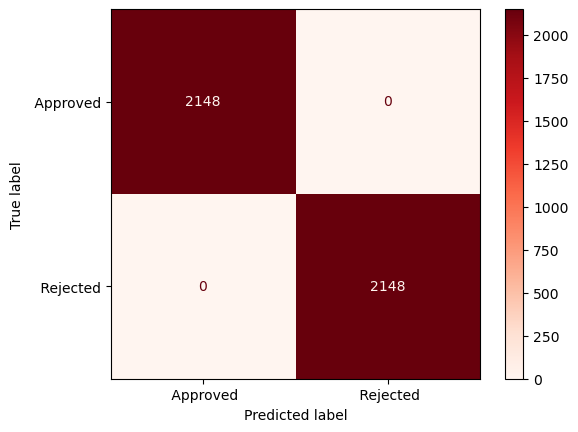

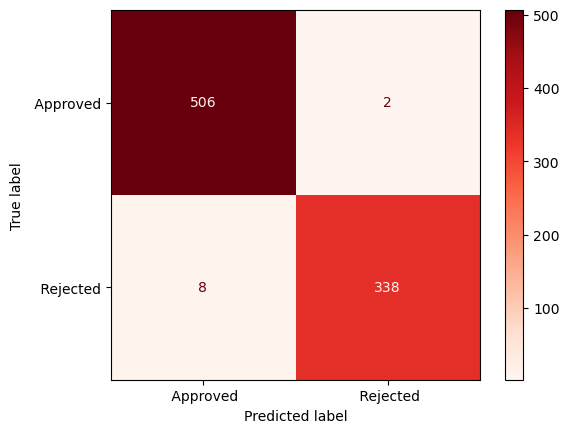

In [393]:
# Confusion Matrix Random Forest
print('Confusion Matrix Random Forest Train: \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_balanced, y_train_balanced, cmap='Reds'))
print('Confusion Matrix Random Forest Test: \n', ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Reds'))

Confusion Matrix Catboost Train: 
Confusion Matrix Catboost Test: 


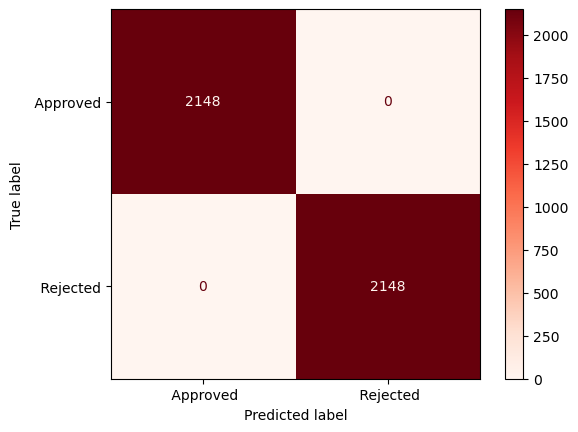

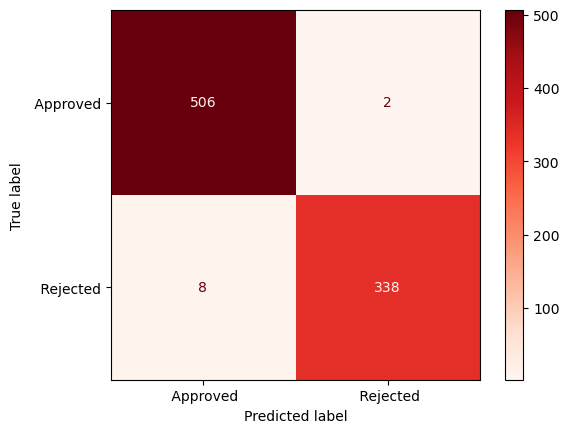

In [395]:
# Confusion Matrix Catboost
print('Confusion Matrix Catboost Train: \n', ConfusionMatrixDisplay.from_estimator(catboost, X_train_balanced, y_train_balanced, cmap='Reds'))
print('Confusion Matrix Catboost Test: \n', ConfusionMatrixDisplay.from_estimator(catboost, X_test, y_test, cmap='Reds'))

insight:
- Model Random Forest dan Catboost memiliki performa sangat baik pada train set. Seperti yang terlihat pada Confusion Matrix Display tidak ada kesalahan klasifikasi. Semua label pada train set diklasifikasikan dengan benar.
- Model Random Forest dan Catboost menunjukkan performa yang cukup baik pada test set dengan hanya 2 false positives dan 8 false negatives yang artinya mampu mengklasifikasikan sebagian besar data dengan benar meskipun ada beberapa kesalahan dengan rasio yang rendah.

### 8.1.1. Cross Validation

In [397]:
# cross validation score
cv_scores_knn = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")
cv_scores_svm = cross_val_score(svm, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")
cv_scores_dt = cross_val_score(dt, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")
cv_scores_rf = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")
cv_scores_catboost = cross_val_score(catboost, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")

print("Cross-Validation (CV):")
print(f"CV Scores KNN             : {cv_scores_knn}")
print(f"CV Scores SVM             : {cv_scores_svm}")
print(f"CV Scores Decission Tree  : {cv_scores_dt}")
print(f"CV Scores Random Forest   : {cv_scores_rf}")
print(f"CV Scores Catboost        : {cv_scores_catboost}")
print("")
print(f"Mean CV Score KNN             : {cv_scores_knn.mean():.4f}")
print(f"Mean CV Score SVM             : {cv_scores_svm.mean():.4f}")
print(f"Mean CV Score Decission Tree  : {cv_scores_dt.mean():.4f}")
print(f"Mean CV Score Random Forest   : {cv_scores_rf.mean():.4f}")
print(f"Mean CV Score Catboost        : {cv_scores_catboost.mean():.4f}")
print("")
print(f"Standard Deviation CV Scores KNN               : {cv_scores_knn.std():.4f}")
print(f"Standard Deviation CV Scores SVM               : {cv_scores_svm.std():.4f}")
print(f"Standard Deviation CV Scores Decission Tree    : {cv_scores_dt.std():.4f}")
print(f"Standard Deviation CV Scores Random Forest     : {cv_scores_rf.std():.4f}")
print(f"Standard Deviation CV Scores Catboost          : {cv_scores_catboost.std():.4f}")

Cross-Validation (CV):
CV Scores KNN             : [0.93023256 0.9185099  0.91385332 0.93131548 0.94877765]
CV Scores SVM             : [0.94186047 0.94179278 0.93480792 0.94412107 0.95343423]
CV Scores Decission Tree  : [0.97674419 0.97438882 0.9790454  0.97555297 0.98603027]
CV Scores Random Forest   : [0.98604651 0.9790454  0.9790454  0.98253783 0.98137369]
CV Scores Catboost        : [0.9872093  0.98486612 0.98253783 0.98370198 0.98603027]

Mean CV Score KNN             : 0.9285
Mean CV Score SVM             : 0.9432
Mean CV Score Decission Tree  : 0.9784
Mean CV Score Random Forest   : 0.9816
Mean CV Score Catboost        : 0.9849

Standard Deviation CV Scores KNN               : 0.0121
Standard Deviation CV Scores SVM               : 0.0060
Standard Deviation CV Scores Decission Tree    : 0.0041
Standard Deviation CV Scores Random Forest     : 0.0026
Standard Deviation CV Scores Catboost          : 0.0017


insight:
- Catboost memiliki kestabilan yang terbaik diikut Random Forest dan Decission Tree.
- Berdasarkan hasil performa akurasi dan cross validation ini maka akan dicoba model Random Forest dan Catboost akan ditindaklanjuti untuk hyperparameter tuning.

## 8.2. Hyperparameter Tuning

Hyperparameter Tuning akan menggunakan Grid Search untuk mencari kombinasi parameter terbaik dengan mencoba setiap kombinasi parameter tanpa dilewatkan satu pun.

In [425]:
# init parameter for gridsearch random forest
param_grid_rf = {
    "rf__n_estimators": [50, 100, 200],
    "rf__criterion": ["gini", "entropy"],
    "rf__max_features": [None, "sqrt", "log2"],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__bootstrap": [True, False]
}

In [426]:
# init parameter for gridsearch catboost
param_grid_catboost = {
    "catboost__depth": [6, 8, 10],
    "catboost__learning_rate": [0.01, 0.05, 0.1],
    "catboost__iterations": [100, 200, 300],  
    "catboost__l2_leaf_reg": [1, 3, 5],  
    "catboost__border_count": [32, 64, 128],  
    "catboost__bagging_temperature": [0.5, 1, 1.5],  
    "catboost__scale_pos_weight": [1, 3, 5]  
}

In [427]:
# grid search random forest
grid_search_rf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid_rf, 
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

In [428]:
# grid search catboost
grid_search_catboost = GridSearchCV(estimator=catboost, 
                           param_grid=param_grid_catboost, 
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

In [455]:
# fit grid search random forest
grid_search_rf.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=None, rf__max_features=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.2s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=None, rf__max_features=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.2s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=None, rf__max_features=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.2s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=None, rf__max_features=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.2s
[CV] END rf__bootstrap=True, rf__criterion=gini, rf__max_depth=None, rf__max_features=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50; total time=   0.2s
[CV] END rf__bootstrap=True, rf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True, False],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [None, 10, 20],
                         'rf__max_features': [None, 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             verbose=2)

In [430]:
# fit grid search catboost
grid_search_catboost.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END catboost__bagging_temperature=0.5, catboost__border_count=32, catboost__depth=6, catboost__iterations=100, catboost__l2_leaf_reg=1, catboost__learning_rate=0.01, catboost__scale_pos_weight=1; total time=   0.2s
[CV] END catboost__bagging_temperature=0.5, catboost__border_count=32, catboost__depth=6, catboost__iterations=100, catboost__l2_leaf_reg=1, catboost__learning_rate=0.01, catboost__scale_pos_weight=1; total time=   0.2s
[CV] END catboost__bagging_temperature=0.5, catboost__border_count=32, catboost__depth=6, catboost__iterations=100, catboost__l2_leaf_reg=1, catboost__learning_rate=0.01, catboost__scale_pos_weight=1; total time=   0.2s
[CV] END catboost__bagging_temperature=0.5, catboost__border_count=32, catboost__depth=6, catboost__iterations=100, catboost__l2_leaf_reg=1, catboost__learning_rate=0.01, catboost__scale_pos_weight=3; total time=   0.2s
[CV] END catboost__bagging_temperature=0.5, catboost__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('selector',
                                                         Pipeline(steps=[('selector',
                                                                          ColumnTransformer(transformers=[('select',
                                                                                                           'passthrough',
                                                                                                           ['no_of_dependents',
                                                                                                            'income_annum',
                                                                                                            'loan_amount',
                                                                                                            'loan_term',
                                                                                                            'cibil_score',
                                                                                                            'residential_assets_value',
                                                                                                            'commercial_assets_value',
                                                                                                            'luxury_assets_value',
                                                                                                            'bank_asset_value'])]))])),...
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x30f242ae0>)]),
             n_jobs=-1,
             param_grid={'catboost__bagging_temperature': [0.5, 1, 1.5],
                         'catboost__border_count': [32, 64, 128],
                         'catboost__depth': [6, 8, 10],
                         'catboost__iterations': [100, 200, 300],
                         'catboost__l2_leaf_reg': [1, 3, 5],
                         'catboost__learning_rate': [0.01, 0.05, 0.1],
                         'catboost__scale_pos_weight': [1, 3, 5]},
             verbose=2)

In [468]:
# Random Forest
print("Random Forest")
# show best parameter
print("Best Parameters:")
print(grid_search_rf.best_params_)
# show best score
print("Best Score:")
print(grid_search_rf.best_score_)
print("")

# Catboost
print("Catboost")
# show best parameter
print("Best Parameters:")
print(grid_search_catboost.best_params_)
# show best score
print("Best Score:")
print(grid_search_catboost.best_score_)

Random Forest
Best Parameters:
{'rf__bootstrap': True, 'rf__criterion': 'entropy', 'rf__max_depth': None, 'rf__max_features': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Best Score:
0.9864983620759672

Catboost
Best Parameters:
{'catboost__bagging_temperature': 0.5, 'catboost__border_count': 32, 'catboost__depth': 6, 'catboost__iterations': 300, 'catboost__l2_leaf_reg': 1, 'catboost__learning_rate': 0.1, 'catboost__scale_pos_weight': 1}
Best Score:
0.9855684002490728


In [518]:
# best estimator random forest
best_rf = grid_search_rf.best_estimator_

# best estimator catboost
best_catboost = grid_search_catboost.best_estimator_

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('selector',
                                  Pipeline(steps=[('selector',
                                                   ColumnTransformer(transformers=[('select',
                                                                                    'passthrough',
                                                                                    ['no_of_dependents',
                                                                                     'income_annum',
                                                                                     'loan_amount',
                                                                                     'loan_term',
                                                                                     'cibil_score',
                                                                                     'residential_assets_value',
                                                                                     'commercial_assets_value',
                                                                                     'luxury_assets_value',
                                                                                     'bank_asset_value'])]))])),
                                 ('scaler', MinMaxScaler())])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x309317770>)])

In [519]:
# best estimator random forest
best_est_rf = [
    ("selector", selector),
    ("rf", best_rf)
]

best_model_rf = Pipeline(best_est_rf)

best_model_rf.fit(X_train_balanced, y_train_balanced)

# predict train and test set
y_train_best_pred_rf = best_model_rf.predict(X_train)
y_test_best_pred_rf = best_model_rf.predict(X_test)

In [520]:
# best estimator cat boost
best_est_catboost = [
    ("catboost", best_catboost)
]

best_model_catboost = Pipeline(best_est_catboost)

best_model_catboost.fit(X_train_balanced, y_train_balanced)

# predict train and test set
y_train_best_pred_catboost = best_model_catboost.predict(X_train)
y_test_best_pred_catboost = best_model_catboost.predict(X_test)

In [512]:
# comparison baseline and best estimator
# base line
print("Random Forest")
print("Baseline:")
print("Classification Report (Train):")
print(classification_report(y_train_balanced, y_pred_train_rf))
print("")
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train_balanced, y_pred_train_rf))

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_rf))
print("")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_rf))
print("")

# hyperparameter tuning
print("Hyperparameter Tuning:")
print("Classification Report (Train):")
print(classification_report(y_train, y_train_best_pred_rf))
print("")
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_best_pred_rf))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_best_pred_rf))
print("")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_best_pred_rf))

Random Forest
Baseline:
Classification Report (Train):
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2148
    Rejected       1.00      1.00      1.00      2148

    accuracy                           1.00      4296
   macro avg       1.00      1.00      1.00      4296
weighted avg       1.00      1.00      1.00      4296


Confusion Matrix (Train):
[[2148    0]
 [   0 2148]]
Classification Report (Test):
              precision    recall  f1-score   support

    Approved       0.98      1.00      0.99       508
    Rejected       0.99      0.98      0.99       346

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854


Confusion Matrix (Test):
[[506   2]
 [  8 338]]

Hyperparameter Tuning:
Classification Report (Train):
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00     

In [529]:
# comparison baseline and best estimator
# base line
print("Catboost")
print("Baseline:")
print("Classification Report (Train):")
print(classification_report(y_train_balanced, y_pred_train_catboost))
print("")
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train_balanced, y_pred_train_catboost))

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_catboost))
print("")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_test_catboost))
print("")

# hyperparameter tuning
print("Hyperparameter Tuning:")
print("Classification Report (Train):")
print(classification_report(y_train, y_train_best_pred_catboost))
print("")
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_best_pred_catboost))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_best_pred_catboost))
print("")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_best_pred_catboost))

Catboost
Baseline:
Classification Report (Train):
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2148
    Rejected       1.00      1.00      1.00      2148

    accuracy                           1.00      4296
   macro avg       1.00      1.00      1.00      4296
weighted avg       1.00      1.00      1.00      4296


Confusion Matrix (Train):
[[2148    0]
 [   0 2148]]
Classification Report (Test):
              precision    recall  f1-score   support

    Approved       0.98      1.00      0.99       508
    Rejected       0.99      0.98      0.99       346

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854


Confusion Matrix (Test):
[[506   2]
 [  8 338]]

Hyperparameter Tuning:
Classification Report (Train):
              precision    recall  f1-score   support

    Approved       1.00      1.00      1.00      2148

insight:
- Performa setelah hyperparameter tuning perbedaannya tidak terlalu signifikan karena memang pada performa baselinenya itu sendiri sudah termasuk baik.
- Berdasarkan hasil tersebut maka Random Forest akan dipilih untuk model inferencing. Berhubung dataset ini bukan dataset yang termasuk kompleks maka Random Forest akan digunakan karena lebih sederhana dan lebih cepat dalam hal pelatihan dan penerapan dibandingkan dengan Catboost

## 8.3. Modal Evaluation Conclusion

- Dari hasil performa baseline didapatkan bahwa performa Random Forest dan Catboost (100% train set dan 99% test set) lebih baik dari pada model lainnya dengan kategori termasuk Goodfit
- Hyperparameter tuning yang dilakukan pada Random Forest dan Catboost tidak menghasilkan perbedaan yang signifikan, ini mungkin dikarenakan dari baseline itu sendiri sudah memiliki performa yang baik
- Oleh karena dataset bukan termasuk dataset yang kompleks dan berdasarkan hasil evaluasi performa maka model yang akan digunakan untuk inferencing adalah Random Forest karena jika dibandingkan dengan Catboost, Random Forest lebih sederhana, lebih cepat dalam hal pelatihan dan penerapannya

# 9. Model Saving

In [522]:
# dump model_predict to model.pkl
joblib.dump(best_model_rf, "deployment/model.pkl")

['deployment/model.pkl']

# 10. Model Inference

Inferencing ada pada file [P1M2_azhar_khaira_inf.ipynb](P1M2_azhar_khaira_inf.ipynb)

Code di bawah merupakan salinan dari `P1M2_azhar_khaira_inf.ipynb`

In [523]:
# load model.pkl
model = joblib.load("deployment/model.pkl")

# data baru
new_data = pd.DataFrame([
    {
    'no_of_dependents': 3,
    'education': ' Graduate',
    'self_employed': ' Yes',
    'income_annum': 9100000,
    'loan_amount': 29700000,
    'loan_term': 20,
    'cibil_score': 500,
    'residential_assets_value': 7100000,
    'commercial_assets_value': 4500000,
    'luxury_assets_value': 33300000,
    'bank_asset_value': 12800000
    },
    {'loan_id': 11,
    'no_of_dependents': 4,
    'education': ' Graduate',
    'self_employed': ' Yes',
    'income_annum': 2900000,
    'loan_amount': 11200000,
    'loan_term': 2,
    'cibil_score': 123,
    'residential_assets_value': 8100000,
    'commercial_assets_value': 4700000,
    'luxury_assets_value': 9500000,
    'bank_asset_value': 3100000}
])

# inferencing new data
predict = model.predict(new_data)

# prediction
print("Hasil Predict: ", predict)
new_data["loan_approval"] = predict
new_data.T

Hasil Predict:  [' Rejected' ' Approved']


0          1
no_of_dependents                  3          4
education                  Graduate   Graduate
self_employed                   Yes        Yes
income_annum                9100000    2900000
loan_amount                29700000   11200000
loan_term                        20          2
cibil_score                     500        123
residential_assets_value    7100000    8100000
commercial_assets_value     4500000    4700000
luxury_assets_value        33300000    9500000
bank_asset_value           12800000    3100000
loan_id                         NaN       11.0
loan_approval              Rejected   Approved

# 11. Conceptual Problems

## 11.1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!

Bagging, singkatan dari "Bootstrap Aggregating" adalah teknik ensemble yang dikembangkan untuk meningkatkan stabilitas dan akurasi model machine learning. Bagging digunakan untuk mengurangi varians dan meningkatkan kinerja model, terutama ketika untuk model seperti decission tree atau model kompleks yang memiliki kecenderungan overfitting.

Model kompleks sering kali dapat menangkap noise dalam data pelatihan yang mengakibatkan performa yang baik pada train set tetapi buruk pada test set (data uji). Bagging menangani masalah ini dengan mengurangi varians model dan meningkatkan generalisasi.

Bagging melibatkan beberapa langkah yaitu:

1. Sampling
Train set digunakan untuk menghasilkan beberapa subset bootstrap. Subset ini diambil dengan pengambilan sampel acak dari train set dengan pengembalian (sampling dengan replacement). Ini berarti beberapa data mungkin muncul lebih dari sekali dalam subset, sementara data lainnya mungkin tidak muncul sama sekali.

2. Model Training
Untuk setiap subset bootstrap yang dihasilkan akan dilatih secara terpisah. Setiap model ini disebut sebagai model base atau base learner.

3. Prediction
Ketika prediksi dilakukan pada test set, setiap model base memberikan prediksi berdasarkan subset yang dilatih. Untuk klasifikasi, kelas yang paling sering dipilih oleh model base menjadi prediksi akhir. Untuk regresi, prediksi akhir dihitung sebagai rata-rata dari prediksi semua model base.

## 11.2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih!

Algoritma Random Forest menggunakan teknik bagging dengan membuat banyak pohon keputusan secara independen dari sampel data yang diambil secara acak, kemudian menggabungkan hasilnya untuk meningkatkan akurasi dan mengurangi overfitting.

CatBoost menggunakan teknik boosting yang membangun pohon keputusan secara bertahap, dengan setiap pohon baru memperbaiki kesalahan dari pohon sebelumnya dan secara khusus dirancang untuk menangani fitur kategorikal secara efisien tanpa perlu encoding manual.

Dengan kata lain, Random Forest mengandalkan penggabungan hasil dari banyak model sederhana sementara CatBoost berfokus pada peningkatan bertahap dengan penanganan fitur kategorikal yang canggih.

## 11.3. Apa yang dimaksud dengan Cross Validation?

Cross Validation adalah teknik untuk menilai seberapa baik model machine learning akan bekerja pada data yang tidak terlihat (unseen data) dengan cara membagi dataset menjadi beberapa subset dan menggunakan setiap subset sebagai data uji secara bergantian sementara subset lainnya digunakan untuk pelatihan. Ini membantu dalam memastikan bahwa model tidak overfit pada dataset pelatihan dan dapat menggeneralisasi dengan baik ke data baru.

# 12. Conclusion

Model yang telah dibuat adalah model untuk memprediksi persetujuan pinjaman dari ajuan pinjaman berdasarkan data finansial dan aset pengaju pinjaman. Model ini mengujicobakan beberapa model yaitu K-Nearest Neighbors (KNN) dan Support Vector Machine (SVM), Descission Tree, Random Forest dan Catboost dan hasilnya menunjukan bahwa Random Forest dan Catboost memiliki performa yang sama baik dari pada model lainnya. Model Random Forest dan Catboost menunjukan performa akurasi 100% pada train set dan 99% pada test set angka tersebut bisa dibilang termasuk ke dalam Goodfit namun Random Forest memiliki keunggulan dalam segi waktu proses maka dari itu model yang digunakan untuk inferencing adalah Random Forest yang sudah dilakukan hyperparameter tuning.

Berdasarkan performa tersebut model ini setidaknya bisa memprediksi dengan akurasi 99% unseen data (data yang belum pernah dilatih pada model), artinya model ini sangat dapat digunakan untuk memprediksi persetujuan pengajuan pinjaman dan hasilnya memiliki akurasi setidaknya 99% dengan detail 99% akurasi dalam memprediksi peminjaman disetujui dan 99% akurasi dalam memprediksi peminjaman tidak disetujui.

Rekomendasi:

Karena dataset yang digunakan untuk pemodelan ini bisa terbilang baik (relatif terdistribusi normal, sedikit outliers, tidak ada missing value), untuk meningkatkan performa bisa mempertimbangkan untuk mengumpulkan lebih banyak data untuk melatih dan memperkuat model, terutama jika ada potensi ketidakseimbangan kelas atau jika model akan diterapkan pada data dengan distribusi yang berbeda.